# **Predicting car price using linear regression**




# **Import packages**

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import (scale, StandardScaler)
from sklearn import linear_model
from sklearn.linear_model import (LinearRegression, Lasso, Ridge)
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.metrics import (mean_squared_error, r2_score)
import sklearn.metrics as metrics
from statsmodels.stats import diagnostic as diag
from google.colab import files

# **Data scraping**

Scraping data from cars.com website

In [ ]:
session=requests.session()
headers={"User-Agent":"Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8"}
url = 'https://www.cars.com/shopping/results/?makes[]=honda&page=1&page_size=100&stock_type=used&zip=60606'
req=requests.get(url)
soup=bs(req.text,'html.parser')
url2 = 'https://www.cars.com/shopping/results/?makes[]=honda&page=2&page_size=100&stock_type=used&zip=60606'
req2=requests.get(url2)
soup2=bs(req2.text,'html.parser')
url3 = 'https://www.cars.com/shopping/results/?makes[]=honda&page=3&page_size=100&stock_type=used&zip=60606'
req3=requests.get(url3)
soup3=bs(req3.text,'html.parser')
url4 = 'https://www.cars.com/shopping/results/?makes[]=honda&page=4&page_size=100&stock_type=used&zip=60606'
req4=requests.get(url4)
soup4=bs(req4.text,'html.parser')

# **Exploratory data analysis (EDA)**

 **Pre-Processing**

In [ ]:
DESCRIPTION = []
for element in soup.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
for element in soup2.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
for element in soup3.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
for element in soup4.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
len(DESCRIPTION)

400

In [ ]:
len(DESCRIPTION)

400

In [ ]:
DEALER = []
for element in soup.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))
for element in soup2.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))
for element in soup3.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))
for element in soup4.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))

In [ ]:
len(DEALER)

400

In [ ]:
MILES_DRIVEN = []
for element in soup.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
for element in soup2.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
for element in soup3.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
for element in soup4.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
MILES_DRIVEN = list(map(float,MILES_DRIVEN))

In [ ]:
len(MILES_DRIVEN)

400

In [ ]:
type(MILES_DRIVEN[0])

float

In [ ]:
RATE = []
for element in soup.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
for element in soup2.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
for element in soup3.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
for element in soup4.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
RATE = list(map(float,RATE))

In [ ]:
len(RATE)

399

In [ ]:
type(RATE[0])

float

In [ ]:
NO_OF_REVIEWS = []
for element in soup.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
for element in soup2.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
for element in soup3.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
for element in soup4.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
NO_OF_REVIEWS = list(map(int,NO_OF_REVIEWS))

In [ ]:
len(NO_OF_REVIEWS)

399

In [ ]:
type(NO_OF_REVIEWS[0])

int

In [ ]:
PRICE = []
for element in soup.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
for element in soup2.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
for element in soup3.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
for element in soup4.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
PRICE = list(map(float,PRICE))

In [ ]:
len(PRICE)

400

In [ ]:
type(PRICE[0])

float

In [ ]:
list_of_tuples = list(zip(DESCRIPTION, DEALER, MILES_DRIVEN ,RATE ,NO_OF_REVIEWS, PRICE))

In [ ]:
df = pd.DataFrame(list_of_tuples, columns = ['DESCRIPTION', 'DEALER', 'MILES_DRIVEN', 'RATE','NO_OF_REVIEWS','PRICE'])

In [ ]:
df[['MODEL','CAR_NAME']]=pd.DataFrame(df.DESCRIPTION.tolist(), index= df.index)  

In [ ]:
df

,DESCRIPTION,DEALER,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE,MODEL,CAR_NAME
0,"[2016, Honda CR-V EX]",Honda of Downtown Chicago,46994.0,4.0,67,22665.0,2016,Honda CR-V EX
1,"[2012, Honda CR-V EX]",McGrath Lexus Chicago,94493.0,4.7,263,15574.0,2012,Honda CR-V EX
2,"[2018, Honda CR-V EX]",Honda of Downtown Chicago,19944.0,4.0,67,28000.0,2018,Honda CR-V EX
3,"[2020, Honda Accord Sport 1.5T]",Honda of Downtown Chicago,11936.0,4.0,67,28844.0,2020,Honda Accord Sport 1.5T
4,"[2017, Honda Civic LX]",Honda of Downtown Chicago,41768.0,4.0,67,20000.0,2017,Honda Civic LX
...,...,...,...,...,...,...,...,...
394,"[2008, Honda CR-V EX]",B & M Auto Sales,99055.0,4.7,126,12900.0,2008,Honda CR-V EX
395,"[2006, Honda Odyssey TOURING]",Audi Naperville,128470.0,4.6,98,7491.0,2006,Honda Odyssey TOURING
396,"[2011, Honda CR-V EX-L]",Cadillac of Naperville,114317.0,3.7,6162,12995.0,2011,Honda CR-V EX-L
397,"[2020, Honda Odyssey EX]","Vroom - Get It Delivered Nationwide, Contact-Free",10097.0,2.1,8,37999.0,2020,Honda Odyssey EX


In [ ]:
df = df.iloc[:, [0,7,6,1,2,3,4,5]] # change order of data frame columns 

In [ ]:
df.drop('DESCRIPTION',axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,CAR_NAME,MODEL,DEALER,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE
0,Honda CR-V EX,2016,Honda of Downtown Chicago,46994.0,4.0,67,22665.0
1,Honda CR-V EX,2012,McGrath Lexus Chicago,94493.0,4.7,263,15574.0
2,Honda CR-V EX,2018,Honda of Downtown Chicago,19944.0,4.0,67,28000.0
3,Honda Accord Sport 1.5T,2020,Honda of Downtown Chicago,11936.0,4.0,67,28844.0
4,Honda Civic LX,2017,Honda of Downtown Chicago,41768.0,4.0,67,20000.0
...,...,...,...,...,...,...,...
394,Honda CR-V EX,2008,B & M Auto Sales,99055.0,4.7,126,12900.0
395,Honda Odyssey TOURING,2006,Audi Naperville,128470.0,4.6,98,7491.0
396,Honda CR-V EX-L,2011,Cadillac of Naperville,114317.0,3.7,6162,12995.0
397,Honda Odyssey EX,2020,"Vroom - Get It Delivered Nationwide, Contact-Free",10097.0,2.1,8,37999.0


In [ ]:
df.describe()

,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE
count,399.000000,399.000000,399.000000,399.000000
mean,48323.822055,4.316291,922.102757,24773.591479
std,37867.267520,0.609894,1450.564542,8623.069755
min,223.000000,2.100000,1.000000,3995.000000
25%,22522.500000,4.000000,67.000000,18997.500000
50%,36987.000000,4.600000,327.000000,24475.000000
75%,65847.000000,4.700000,1094.000000,30997.000000
max,269590.000000,5.000000,7969.000000,46888.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CAR_NAME       399 non-null    object 
 1   MODEL          399 non-null    object 
 2   DEALER         399 non-null    object 
 3   MILES_DRIVEN   399 non-null    float64
 4   RATE           399 non-null    float64
 5   NO_OF_REVIEWS  399 non-null    int64  
 6   PRICE          399 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 21.9+ KB


Missing values:

In [ ]:
df.isnull().sum()

CAR_NAME         0
MODEL            0
DEALER           0
MILES_DRIVEN     0
RATE             0
NO_OF_REVIEWS    0
PRICE            0
dtype: int64

Duplicate:

In [ ]:
df.duplicated().sum()

0

In [ ]:
len(df)

399

Convert the DataType of the MODEL from object into numeric

In [ ]:
df["MODEL"] = pd.to_numeric(df["MODEL"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Verify the process of converting the data type of the MODEL column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CAR_NAME       399 non-null    object 
 1   MODEL          399 non-null    int64  
 2   DEALER         399 non-null    object 
 3   MILES_DRIVEN   399 non-null    float64
 4   RATE           399 non-null    float64
 5   NO_OF_REVIEWS  399 non-null    int64  
 6   PRICE          399 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 21.9+ KB


In [ ]:
df 

,CAR_NAME,MODEL,DEALER,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE
0,Honda CR-V EX,2016,Honda of Downtown Chicago,46994.0,4.0,67,22665.0
1,Honda CR-V EX,2012,McGrath Lexus Chicago,94493.0,4.7,263,15574.0
2,Honda CR-V EX,2018,Honda of Downtown Chicago,19944.0,4.0,67,28000.0
3,Honda Accord Sport 1.5T,2020,Honda of Downtown Chicago,11936.0,4.0,67,28844.0
4,Honda Civic LX,2017,Honda of Downtown Chicago,41768.0,4.0,67,20000.0
...,...,...,...,...,...,...,...
394,Honda CR-V EX,2008,B & M Auto Sales,99055.0,4.7,126,12900.0
395,Honda Odyssey TOURING,2006,Audi Naperville,128470.0,4.6,98,7491.0
396,Honda CR-V EX-L,2011,Cadillac of Naperville,114317.0,3.7,6162,12995.0
397,Honda Odyssey EX,2020,"Vroom - Get It Delivered Nationwide, Contact-Free",10097.0,2.1,8,37999.0


**Visualize data**

The first plot is a histogram plot to show the Count Of Cars By Price, and the second plot is a distplot that represent the Density or Relative Frequency Of Cars By Price.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

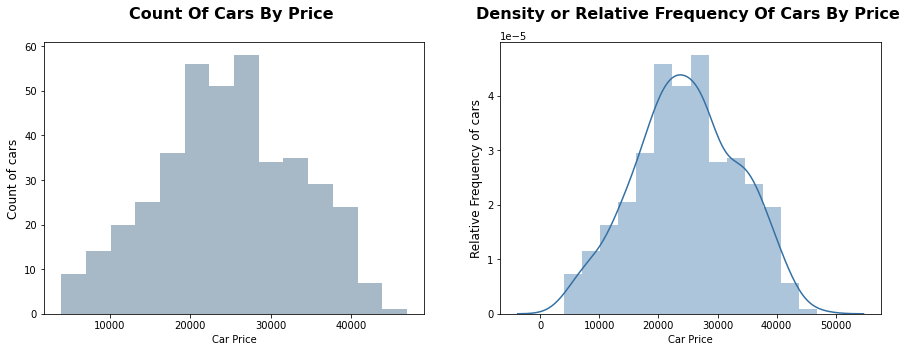

In [ ]:
fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(df['PRICE'], norm_hist=False, kde=False, ax=ax[0], color='#255075') #'#3470A3', '#79ABC9'
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price \n',size=16,weight="bold")

sns.distplot(df['PRICE'], kde=True, ax=ax[1], color= '#3470A3')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price \n',size=16,weight="bold")
#plt.savefig('visu.png') # To save the plot.
#files.download('visu.png') # To download the plot to your computer.

**Using pairplot to shows the relationship for (n, 2) combination of features in a DataFrame.**

<Figure size 1440x720 with 0 Axes>

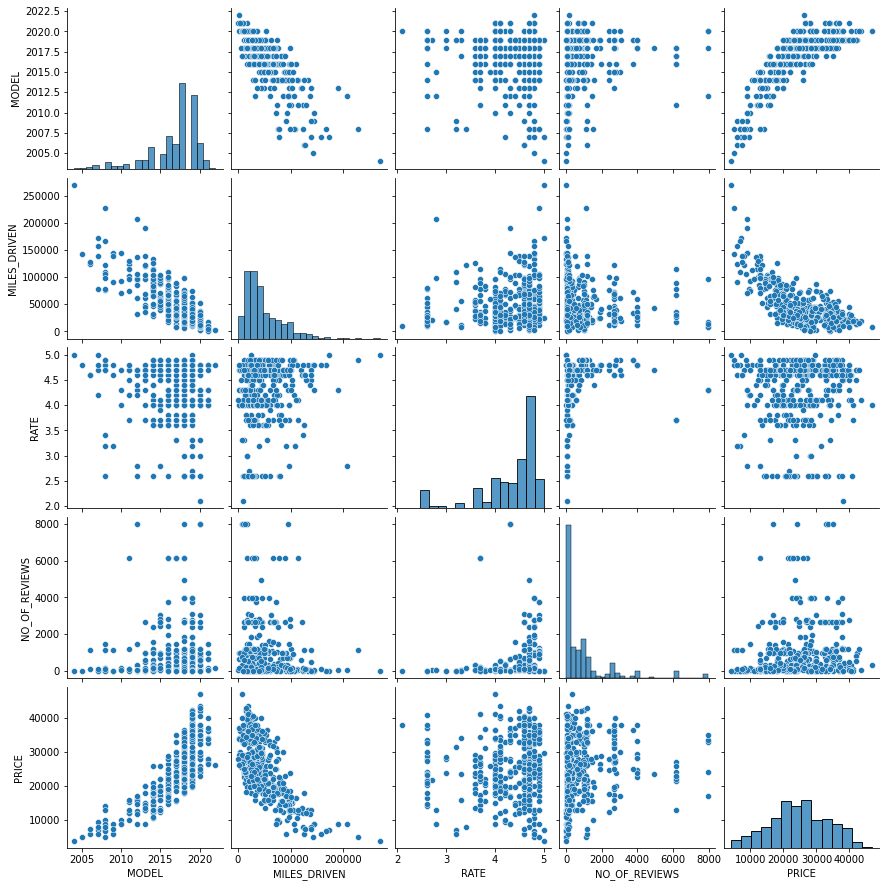

In [ ]:
cars_numeric=df.select_dtypes(include=['float64','int64']) # creating df with numeric features only
plt.figure(figsize=(20, 10)) # size of the figure
sns.pairplot(cars_numeric) 
#plt.savefig('corr.png') # To save the plot.
#files.download('corr.png') # To download the plot to your computer.

Before we begin modeling, use the `corr()` function to get a feel for the correlations among the different variables, especially with regard to 'price'.

In [ ]:
df.corr()['PRICE'].sort_values(ascending=False)

PRICE            1.000000
MODEL            0.795848
NO_OF_REVIEWS    0.109435
RATE             0.012201
MILES_DRIVEN    -0.699530
Name: PRICE, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

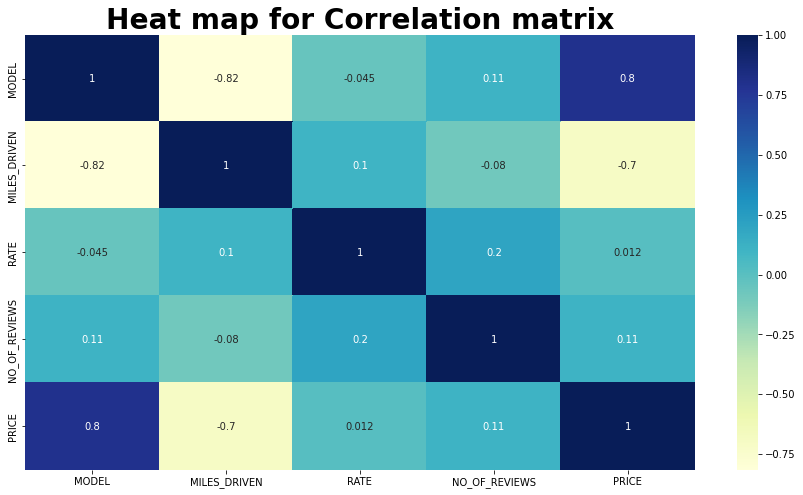

In [ ]:
corr=df.corr()

plt.figure(figsize=(15,8))
plt.title("Heat map for Correlation matrix", fontname="Times New Roman", size=28, fontweight="bold")
sns.heatmap(corr,annot=True,cmap="YlGnBu")
#plt.savefig('heat.png') # To save the plot.
#files.download('heat.png') # To download the plot to your computer.

check if there outliers in price featurs

Box Plot to detect the outliers in each feature

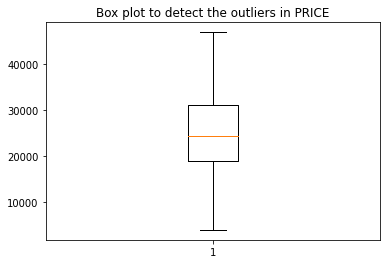

In [ ]:
plt.boxplot(df["PRICE"])
plt.title("Box plot to detect the outliers in PRICE")
plt.show()

# **Feature engineering**

Creating dummy variables for categorical variables

In [ ]:
dealer_counts = df.DEALER.value_counts() # drop this coulmn because it contains about 153 feature which is a looooooot 
dealer_counts


North City Honda                22
Schaumburg Honda Automobiles    18
Muller Honda                    17
McGrath City Honda              16
Continental Honda               15
                                ..
Nexton Motors LLC                1
Volkswagen of Mount Prospect     1
Roesch Ford                      1
Glenview Luxury Imports          1
Midway Autohaus                  1
Name: DEALER, Length: 154, dtype: int64

In [ ]:
df=df.drop(columns=['DEALER'])

In [ ]:
name_counts = df.CAR_NAME.value_counts() # convert to dummies for features contain 12 variables and more and the others is renamed to others thus will have about 8 features + 6 features and a total of 14 feature 
name_counts

Honda Odyssey EX-L      33
Honda Pilot EX-L        31
Honda Accord EX-L       31
Honda Civic LX          29
Honda CR-V EX           24
                        ..
Honda Fit                1
Honda Accord EX-L V6     1
Honda CR-V               1
Honda Accord             1
Honda Odyssey            1
Name: CAR_NAME, Length: 64, dtype: int64

In [ ]:
other_name = list(name_counts[name_counts < 25].index) # "return the indcies for the DEALER counts less than 3"
df['CAR_NAME'] = df['CAR_NAME'].replace(other_name, 'Other')


df= pd.get_dummies(df, drop_first=True)

In [ ]:
df

,MODEL,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE,CAR_NAME_Honda Civic LX,CAR_NAME_Honda Odyssey EX-L,CAR_NAME_Honda Pilot EX-L,CAR_NAME_Other
0,2016,46994.0,4.0,67,22665.0,0,0,0,1
1,2012,94493.0,4.7,263,15574.0,0,0,0,1
2,2018,19944.0,4.0,67,28000.0,0,0,0,1
3,2020,11936.0,4.0,67,28844.0,0,0,0,1
4,2017,41768.0,4.0,67,20000.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
394,2008,99055.0,4.7,126,12900.0,0,0,0,1
395,2006,128470.0,4.6,98,7491.0,0,0,0,1
396,2011,114317.0,3.7,6162,12995.0,0,0,0,1
397,2020,10097.0,2.1,8,37999.0,0,0,0,1


In [ ]:
df.columns

Index(['MODEL', 'MILES_DRIVEN', 'RATE', 'NO_OF_REVIEWS', 'PRICE',
       'CAR_NAME_Honda Civic LX', 'CAR_NAME_Honda Odyssey EX-L',
       'CAR_NAME_Honda Pilot EX-L', 'CAR_NAME_Other'],
      dtype='object')

Split data into train and test

In [ ]:
X=df.drop(columns=['PRICE'])

In [ ]:
np.random.seed(10)
y=df['PRICE']
df_train,df_test=train_test_split(df,train_size=0.75,random_state=42)

In [ ]:
df_train2, df_val = train_test_split(df_train, test_size=0.25, random_state=3)

**Scaling**

scaling the features makes interpretation of regression coefficients easier

In [ ]:
scaler = StandardScaler()
df_train2[df.columns]=scaler.fit_transform(df_train2[df.columns])
df_val[df.columns]=scaler.transform(df_val[df.columns])
df_test[df.columns]=scaler.transform(df_test[df.columns])

X_train=df_train2.drop('PRICE',axis=1)
y_train=df_train2['PRICE']
X_val=df_val.drop('PRICE',axis=1)
y_val=df_val['PRICE']
X_test=df_test.drop('PRICE',axis=1)
y_test=df_test['PRICE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Show the length of the (X_train, X_test, y_train and y_test) to verify that the process of splitting the data was done correctly.

In [ ]:
print("Length of the X_train = ",len(X_train))
print("Length of the y_train = ",len(y_train))
print("Length of the X_test = ",len(X_test))
print("Length of the y_test = ",len(y_test))
print("Length of the y_val = ",len(y_val))
print("Length of the y_val = ",len(y_val))

Length of the X_train =  224
Length of the y_train =  224
Length of the X_test =  100
Length of the y_test =  100
Length of the y_val =  75
Length of the y_val =  75


# **Model Building**

Model with all features

In [ ]:
seed=12
lm=LinearRegression()
lm1= lm.fit(X_train,y_train)
y_pred_val=lm1.predict(X_val)
y_pred_train=lm1.predict(X_train)
y_pred_test=lm1.predict(X_test)
print("Score of training set = ",lm1.score(X_train,y_train))

Score of training set =  0.7552366387365006


In [ ]:
print("Score of validation set = ",lm1.score(X_val,y_val))

Score of validation set =  0.5839517618135261


In [ ]:
print("Score of test set = ",lm1.score(X_test,y_test))

Score of test set =  0.7465804203840658


In [ ]:
y_pred_train.shape 

(224,)

In [ ]:
y_train.shape

(224,)

In [ ]:
X_train.shape 

(224, 8)

In [ ]:
X_val.shape

(75, 8)

In [ ]:
y_val.shape

(75,)

Train data 

In [ ]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y_pred_train,y_train)

54.82699292302388

In [ ]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_pred_train,y_train)

0.494735647860046

In [ ]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y_pred_train,y_train)

0.37177383678679066

In [ ]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

In [ ]:
def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y_pred_train,y_train)

0.6759116961367436

validation data 

In [ ]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y_pred_val,y_val)

19.079788281188943

In [ ]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_pred_val,y_val)

0.5043780101099962

In [ ]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y_pred_val,y_val)

0.38558590471546156

In [ ]:
def SST(y):
    return np.sum((y - np.mean(y))**2)
def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y_pred_val,y_val)

0.5402671789893949

In [ ]:
results = sm.OLS(y_pred_train, y_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              688.1
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                    4.29e-70
Time:                        19:15:51   Log-Likelihood:                         -128.77
No. Observations:                 224   AIC:                                      259.5
Df Residuals:                     223   BIC:                                      262.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PRICE          0.7552      0.029     26.231      0.000       0.698       0.812
==============================================================================
Omnibus:                        7.983   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.421
Skew:                          -0.318   Prob(JB):                       0.0403
Kurtosis:                       2.469   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results = sm.OLS(y_pred_val, y_val).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.621
Model:                            OLS   Adj. R-squared (uncentered):              0.616
Method:                 Least Squares   F-statistic:                              121.3
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                    2.98e-17
Time:                        19:15:51   Log-Likelihood:                         -47.964
No. Observations:                  75   AIC:                                      97.93
Df Residuals:                      74   BIC:                                      100.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PRICE          0.7367      0.067     11.012      0.000       0.603       0.870
==============================================================================
Omnibus:                       26.003   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.495
Skew:                          -1.225   Prob(JB):                     1.08e-11
Kurtosis:                       6.187   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Regularized Linear Regression (LASSO)**

**Lasso with different lambdas**

Apply the Lasso regression on the training set

In [ ]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

prepare data for enumerate

In [ ]:
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
validate_r_squared = np.zeros(l_num)

In [ ]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    validate_r_squared[ind] = reg.score(X_val, y_val)

Plot all values in the train and test set for both data sets 
R
2
-values as a function of λ. 

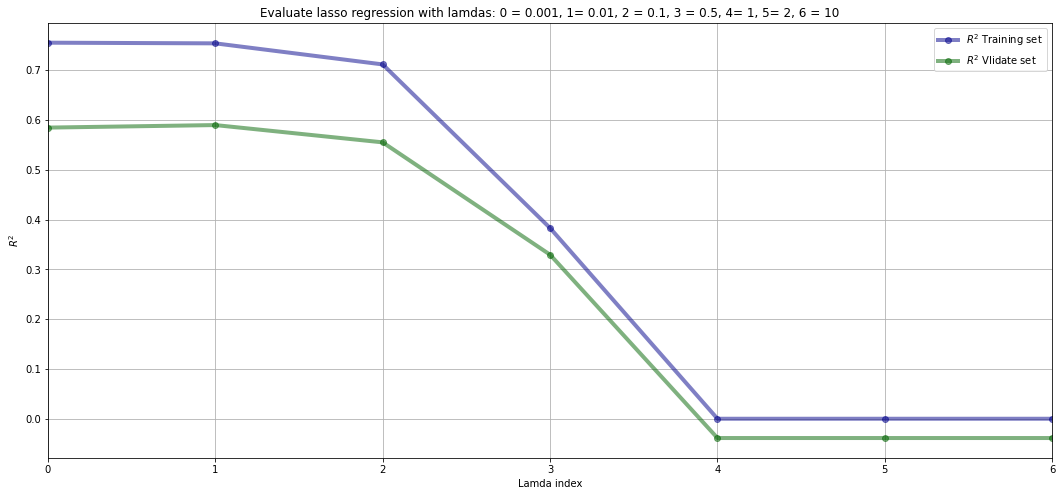

In [ ]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue",alpha=0.5,  linewidth=4)
plt.plot(validate_r_squared, 'bo-', label=r'$R^2$ Vlidate set', color="darkgreen",alpha=0.5, linewidth=4)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()
#plt.savefig('lasso.png') # To save the plot.
#files.download('lasso.png') # To download the plot to your computer.

**Identify best lambda and coefficients**

save the test set into DataFrame

In [ ]:
df_lam = pd.DataFrame(validate_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)

Indentify the lambda where the 
R
2
 has it’s maximum value

In [ ]:
df_lam.loc[df_lam['R_squared'].idxmax()] # returns the index of the row.

R_squared    58.977174
lambda        0.010000
Name: 1, dtype: float64

Fit a Lasso model using the training set and obtain the corresponding regression coefficients

In [ ]:
reg_best = Lasso(alpha = 0.01)
reg_best.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

R^2 for the validation set

In [ ]:
print(" R^2 for the Validation:", r2_score(y_val,  reg_best.predict(X_val))*100)

 R^2 for the Validation: 58.9771735851661


Cross Validation

Evaluate the Lasso regression for different regularization parameters (lamdas) using 5 fold cross validation 

In [ ]:
l_min = 0.05
l_max = 0.2
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [ ]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=5, scoring="r2")

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

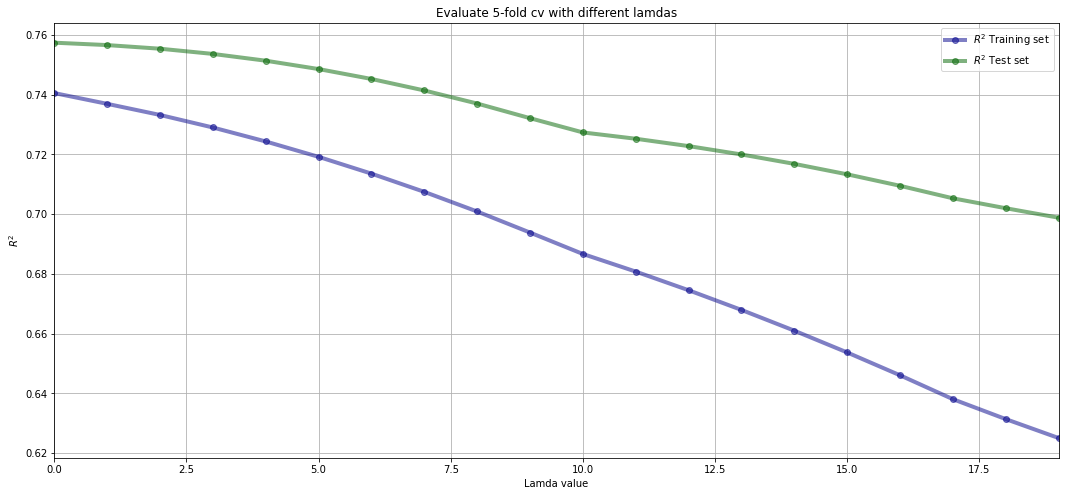

In [ ]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.5, linewidth=4)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkgreen", alpha=0.5, linewidth=4)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

Best Model

In [ ]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    75.74238
lambda        0.05000
Name: 0, dtype: float64

In [ ]:
reg_best = Lasso(alpha = 0.05)
reg_best.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print(" R^2=", r2_score(y_test,  reg_best.predict(X_test)))

 R^2= 0.7574237977446632


**Ridge Regression**

Specify the range of hyperparameters (alpha)


In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

Instantiate Ridge regression

In [ ]:
ridge = Ridge()

Cross validation with 5 folds


In [ ]:
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

Fitting the model with train set


In [ ]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

creating dataframe with model_ridge results

In [ ]:
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001947,0.000682,0.001179,0.000291,0.0001,{'alpha': 0.0001},0.672103,0.752629,0.742729,0.723938,0.760937,0.730467,0.031683,23,0.770402,0.753718,0.758635,0.749871,0.752058,0.756937,0.007325
1,0.001598,0.000104,0.001617,0.001268,0.001,{'alpha': 0.001},0.672103,0.752629,0.742728,0.723943,0.760937,0.730468,0.031682,22,0.770402,0.753718,0.758635,0.749871,0.752058,0.756937,0.007325
2,0.001560,0.000022,0.000963,0.000005,0.01,{'alpha': 0.01},0.672098,0.752629,0.742724,0.723991,0.760937,0.730476,0.031682,21,0.770402,0.753718,0.758635,0.749871,0.752058,0.756937,0.007325
3,0.001738,0.000380,0.000962,0.000010,0.05,{'alpha': 0.05},0.672077,0.752629,0.742703,0.724205,0.760937,0.730510,0.031679,20,0.770401,0.753718,0.758635,0.749871,0.752058,0.756937,0.007325
4,0.001544,0.000026,0.000969,0.000010,0.1,{'alpha': 0.1},0.672051,0.752629,0.742677,0.724471,0.760936,0.730553,0.031676,19,0.770401,0.753718,0.758635,0.749871,0.752058,0.756937,0.007325


Plotting the mean of the train and test results

In [ ]:
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

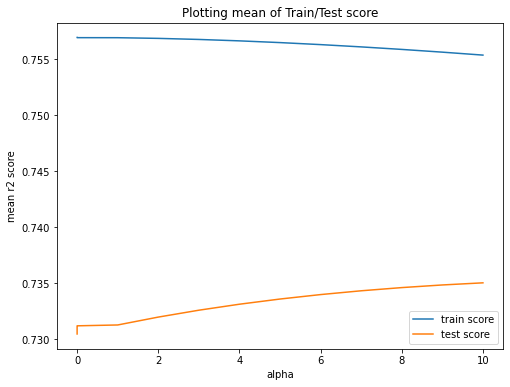

In [ ]:

plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])

plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.title('Plotting mean of Train/Test score')
plt.show()
#plt.savefig('ridge.png') # To save the plot.
#files.download('ridge.png') # To download the plot to your computer.

We need to pick the value of alpha for which the test score peaks up. In this case in alpha=2, the error is least in the test set and hence the accuracy is more approximately 73.3%.

Ridge regression with optimal alpha = 2

In [ ]:
model_ridge = Ridge(alpha=2)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Model evaluation Ridge Regression

Model performance on the train set

In [ ]:
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.755188956903733


Model performance on the test set

In [ ]:
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.7482163879012937


**Evaluating the Three models using Test set across these three models**

In [ ]:
y_pred = lm1.predict(X_test)
print("Linear Regression:", r2_score(y_test, y_pred))

y_pred = reg_best.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

y_pred = model_ridge.predict(X_test)
print("Ridge Regression:", r2_score(y_test, y_pred))

Linear Regression: 0.7465804203840658
Lasso Regression: 0.7574237977446632
Ridge Regression: 0.7482163879012937


# Linear Regression Assumptions Validation

**Assumption 1: regression is linear in parameters and correctly specified**

In [ ]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x) # "regression prediction"

    plt.subplot(1, 3, 1)
    plt.scatter(x,y) # "scatter"
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res) # "scatter supposed to have no pattern"
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt) # "normal qq plot"
    plt.title("Normal Q-Q plot")

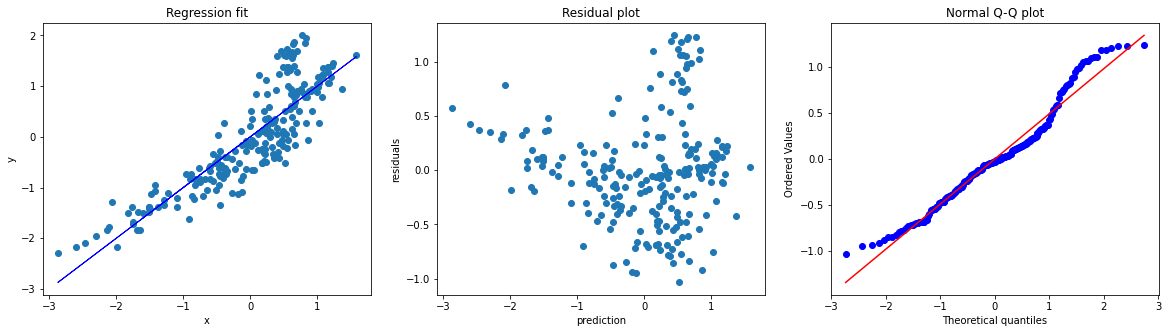

In [ ]:
diagnostic_plot(y_pred_train.reshape(224,1), y_train)

**Assumption 2: residuals ( ${e_i} = Y_i-\hat{Y}_i$ ) should be normally distributed with zero mean**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Assumption 2 Residuals , Scatter plots for predict and resid')

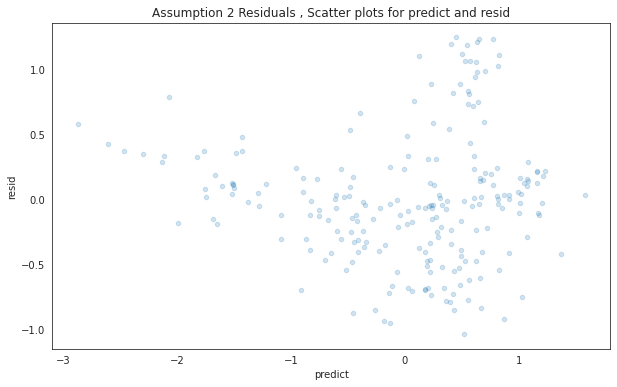

In [ ]:
df_train2['predict']=y_pred_train
df_train2['resid']=y_train-df_train2.predict  # "residuals"
with sns.axes_style('white'):
    plot=df_train2.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

plt.title("Assumption 2 Residuals , Scatter plots for predict and resid")

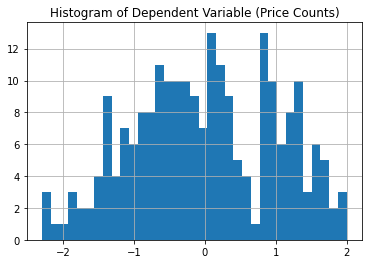

In [ ]:
y_train.hist(bins=35)
plt.title('Histogram of Dependent Variable (Price Counts)');

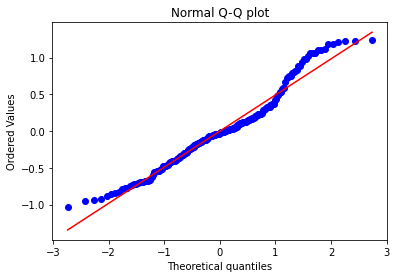

In [ ]:
stats.probplot(df_train2['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Text(0.5, 1.0, 'Plot for MILES_DRIVEN and resid')

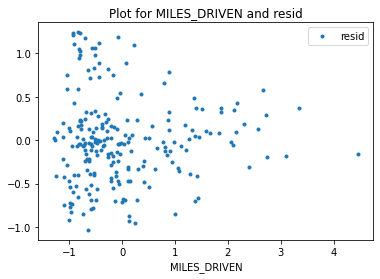

In [ ]:
ts = df_train2[['MILES_DRIVEN','resid']].set_index('MILES_DRIVEN')
ts.plot(style=".");
plt.title("Plot for MILES_DRIVEN and resid")

**Assumption 3: error terms must have constant variance**

In [ ]:
model = sm.OLS(y,X) # "from stats package"
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              1183.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                   1.19e-268
Time:                        19:15:55   Log-Likelihood:                         -3982.0
No. Observations:                 399   AIC:                                      7980.
Df Residuals:                     391   BIC:                                      8012.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MODEL                          12.8448      1.060     12.112      0.000      10.760      14.930
MILES_DRIVEN                   -0.1606      0.007    -22.590      0.000      -0.175      -0.147
RATE                          879.1334    446.979      1.967      0.050       0.351    1757.916
NO_OF_REVIEWS                   0.1240      0.188      0.658      0.511      -0.246       0.494
CAR_NAME_Honda Civic LX     -3414.2264   1365.965     -2.499      0.013   -6099.782    -728.671
CAR_NAME_Honda Odyssey EX-L  8926.5538   1324.100      6.742      0.000    6323.307    1.15e+04
CAR_NAME_Honda Pilot EX-L    9093.4579   1343.149      6.770      0.000    6452.759    1.17e+04
CAR_NAME_Other               2209.9354   1009.577      2.189      0.029     225.057    4194.814
==============================================================================
Omnibus:                       26.867   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.355
Skew:                           0.645   Prob(JB):                     2.56e-07
Kurtosis:                       3.405   Cond. No.                     4.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Scatter plot for residual ')

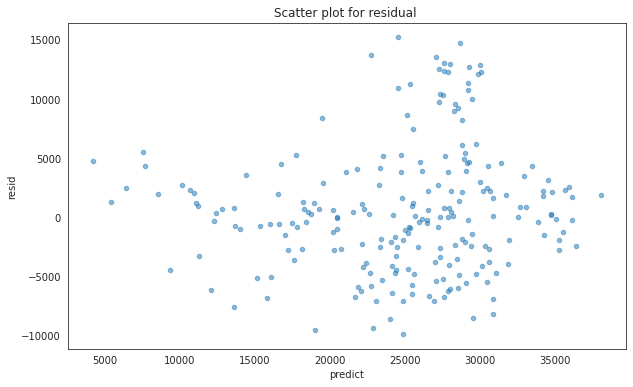

In [ ]:
# create residual plot
df_train2['predict']=fit.predict(X) # "we added the predication to the data frame"
df_train2['resid']= y -df_train2.predict # "we added the residuals to the data frame"
with sns.axes_style('white'):
    plot = df_train2.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))
    
plt.title("Scatter plot for residual ")

Text(0.5, 1.0, 'Histogram plot for price')

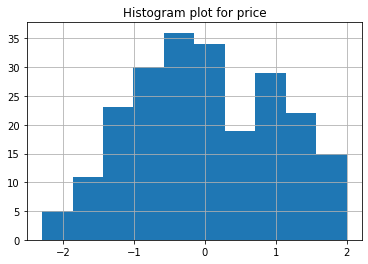

In [ ]:
df_train2.PRICE.hist();
plt.title("Histogram plot for price")

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Histogram plot for log price')

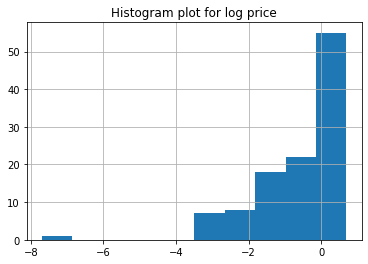

In [ ]:
np.log(df_train2.PRICE).hist();
plt.title("Histogram plot for log price")

Text(0.5, 1.0, 'Regn plt')

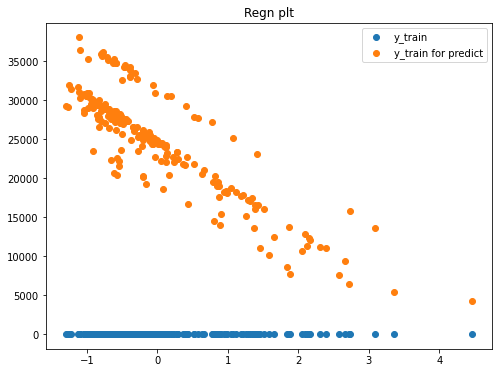

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.scatter(df_train2.MILES_DRIVEN,y_train , label ="y_train")
plt.scatter(df_train2.MILES_DRIVEN,df_train2.predict, label ="y_train for predict");
legend = ax.legend(loc="best")
plt.title ("Regn plt")

In [ ]:
#lamb=stats.boxcox_normmax(df_train2.PRICE, brack=(-1.9, 1.9)) # "Compute optimal Box-Cox transform parameter for input data, brack for intilization"
#print("Lambda:", lamb)
#y_t=(np.power(df_train2.PRICE,-0.2282)-1)/-0.2282 # "the value of lambda is choosen from the box cox normality plot"

#plt.hist(y_t);

**Assumption 4: errors are uncorrelated across observations**



No autocorrelation of residuals


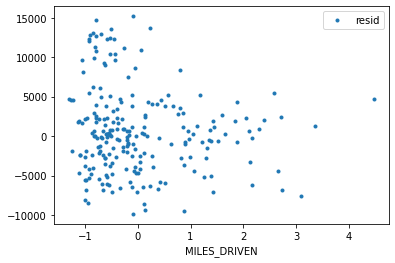

In [ ]:
ts = df_train2[['MILES_DRIVEN','resid']].set_index('MILES_DRIVEN')
ts.plot(style=".");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


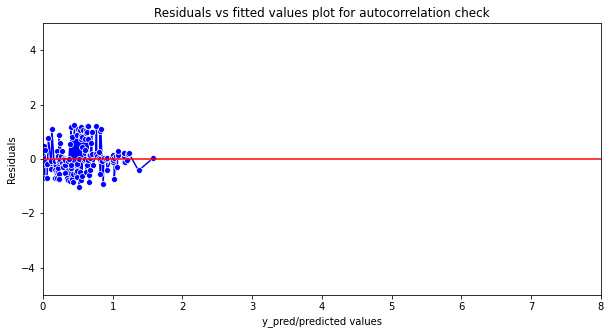

In [ ]:
residuals = y_train.values-y_pred_train
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred_train,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-5,5)
plt.xlim(0,8)
p = sns.lineplot([0,8],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test:

Null Hypothesis: Autocorrelation is absent.

Alternative Hypothesis: Autocorrelation is present.

In [ ]:
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.13856246468211483

Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated

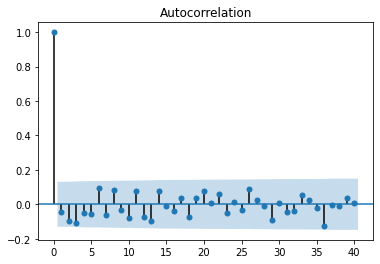

In [ ]:
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

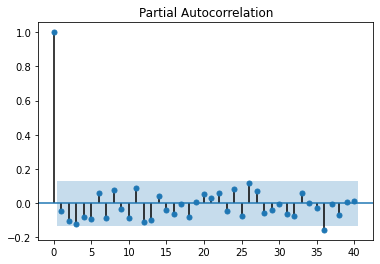

In [ ]:
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

The results show signs of autocorrelation since there are spikes outside the blue confidence interval region. This could be a factor of seasonality in the data.

**Assumption 5: no independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

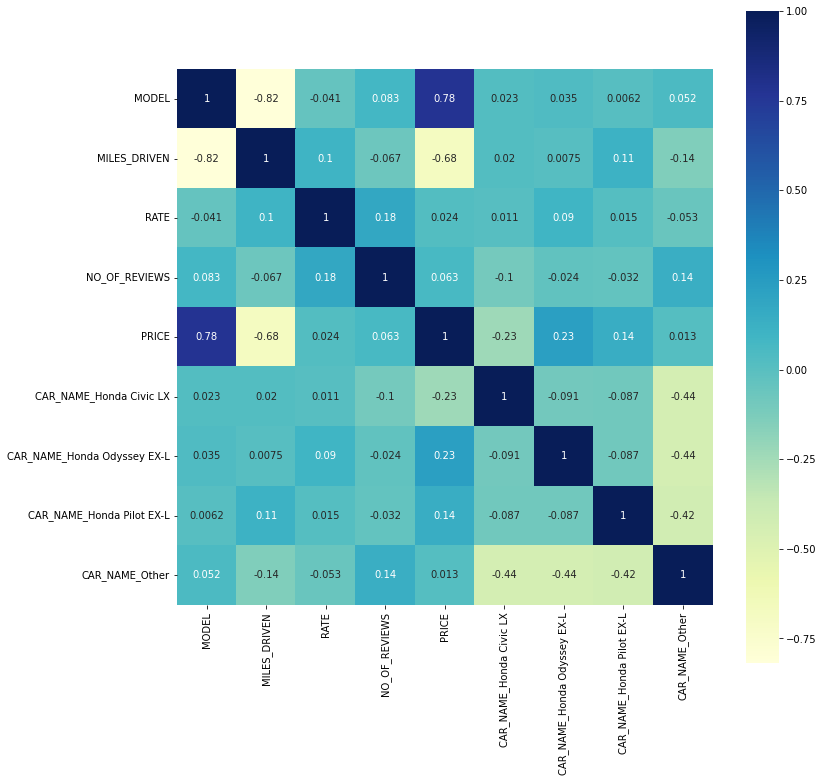

In [ ]:
plt.figure(figsize=(12,12))  
p=sns.heatmap(df_train.corr(), annot=True,cmap='YlGnBu',square=True) 
plt.savefig('ass5.png') # To save the plot.
files.download('ass5.png') # To download the plot to your computer.

To check the dependency -> Draw the heatmap and ensure the all feature dependent to each other.